Lets write the barbershop backend in here as practice

In [6]:
import pandas as pd
import numpy as np

try:
    from ipywidgets import interact
    import ipywidgets as widgets
    from bokeh.io import push_notebook, show, output_notebook
    from bokeh.plotting import figure, ColumnDataSource
    from bokeh.models import Span, LogColorMapper
    from bokeh.layouts import row
    from bokeh.models.tools import HoverTool
    from IPython.display import display
    output_notebook()
    
except ImportError:
    raise ImportError('Please install Bokeh and ipywidgets')

Loading BokehJS ...

In [7]:
from astropy.table import Table
def read_kepler(size=1000):
    data = Table.read('/home/andy/Documents/Research/HackDay/kepler_dr2_1arcsec.fits', format='fits')
    kdf = data.to_pandas()
    kdf.rename(columns={'kepid':'KICID'},inplace=True)
    if size == 'all':
        return kdf
    elif size == 'smaller':
        return kdf[(kdf.ra < 285) & (kdf.dec < 45)]
    else:
        return kdf[:size]
df = read_kepler(size='smaller')
print(len(df))

12688


In [104]:
list(df)

['designation',
 'source_id',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'duplicated_source',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'bp_g',
 'g_rp',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag',
 'l',
 'b',
 'ecl_lon',
 'ecl_lat',
 'teff_val',
 'teff_percentile_lower',
 'teff_percentile_upper',
 'a_g_val',
 'a_g_percentile_lower',
 'a_g_percentile_upper'

In [37]:
def normalise(x):
    """
    Rescale x so that all values run from 0 - 256
    """
    rescale = (x - np.min(x))*256/(np.max(x)-np.min(x))
    return rescale

x = df.ra
y = df.dec

x_n = normalise(x)
y_n = normalise(y)

r = df.r_est
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(x_n, y_n)
]

fig = figure(title="Kepler field!",
           plot_height=600, plot_width=600)
fig.scatter(x, y, radius=df.parallax/500,
            fill_color=colors, line_color=None)

show(fig)

In [21]:
colors

['#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',
 '#26b6b96',

In [4]:
x = df.ra
y = df.dec
r = df.r_est
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

fig = figure(title="Kepler field!",
           plot_height=600, plot_width=600)
fig.scatter(x, y, fill_color=colors)
fig.scatter(x, y, color='field')


df = pd.DataFrame(
    {
        "journey": ['ch1', 'ch2', 'ch2', 'ch1'],
        "cat": ['a', 'b', 'a', 'c'],
        "kpi1": [1,2,3,4],
        "kpi2": [4,3,2,1]
    }
)
source = bpl.ColumnDataSource(df)

# use whatever palette you want...
palette = d3['Category10'][len(df.unique())]
color_map = bmo.CategoricalColorMapper(factors=df['cat'].unique(),
                                   palette=palette)

# create figure and plot
p = bpl.figure()
p.scatter(x='kpi1', y='kpi2',
          color={'field': 'cat', 'transform': color_map},
          legend='cat', source=source)
bpl.show(p)

NameError: name 'pd' is not defined

In [18]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p)  # open a browser



In [19]:
colors

['#876f96',
 '#de7396',
 '#7b2996',
 '#788196',
 '#8ebc96',
 '#7ccf96',
 '#e61e96',
 '#844796',
 '#46be96',
 '#e89496',
 '#6a4396',
 '#948396',
 '#f7a396',
 '#562696',
 '#ef6096',
 '#dd9896',
 '#ae5796',
 '#bf9a96',
 '#e8da96',
 '#99c296',
 '#eb3196',
 '#aedc96',
 '#d0c496',
 '#393396',
 '#3a2896',
 '#8b7f96',
 '#cbb896',
 '#89b096',
 '#6a7c96',
 '#964696',
 '#3fca96',
 '#54bd96',
 '#68c896',
 '#73af96',
 '#63bf96',
 '#c3bc96',
 '#449b96',
 '#90bd96',
 '#eb8896',
 '#eb7e96',
 '#e63696',
 '#8e8396',
 '#a23796',
 '#806c96',
 '#9b8196',
 '#a67196',
 '#87ae96',
 '#f5b396',
 '#616696',
 '#dccd96',
 '#8d5596',
 '#dfc596',
 '#88c896',
 '#793f96',
 '#cb3c96',
 '#bc4996',
 '#579d96',
 '#86e296',
 '#435a96',
 '#532696',
 '#542296',
 '#e86396',
 '#a5ca96',
 '#eba396',
 '#a9c696',
 '#931f96',
 '#d1e396',
 '#647d96',
 '#c9c996',
 '#cdda96',
 '#91a196',
 '#478996',
 '#922396',
 '#c7b296',
 '#58a396',
 '#837c96',
 '#ca2896',
 '#e27296',
 '#92dc96',
 '#b43a96',
 '#4abf96',
 '#abca96',
 '#ec2096',
 '#8

In [9]:
show(fig)

In [27]:
[int(x) for x in df.ra]

[284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284,
 284

In [34]:
def normalise(x):
    
    rescale = (x - np.min(x))*256/(np.max(x)-np.min(x))
    
    return rescale

min(normalise(df.ra))

0.0

In [35]:
min(df.ra)

279.62746002955856

# Building this into a widget

In [92]:
def g(a):
    return (a)

In [85]:
from ipywidgets import interact
from ipywidgets import interactive

In [106]:
w = interactive(g, a=widgets.FloatSlider(min = np.min(df.r_est), max = np.max(df.r_est)))

def g(a):
    return (a)

In [107]:
w

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTE5LjE2OTQ0MzM5MTMyODcsIGRlc2NyaXB0aW9uPXUnYScsIG1heD0xMTUxOS4wNzE2NDY5OTgzLCBtaW49MTkuMTY5NDTigKY=


In [100]:
w.result

279.62746002955856

In [110]:
ralim = w.result

df_filt = df[df.r_est<ralim]

x = df_filt.ra
y = df_filt.dec
#r = df_filt.r_est
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

fig = figure(title="Kepler field!",
           plot_height=600, plot_width=600)
fig.scatter(x, y, fill_color=colors)


show(fig)

In [74]:
show(fig)

In [ ]:
x = df.ra
y = df.dec
r = df.r_est
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

fig = figure(title="Kepler field!",
           plot_height=600, plot_width=600)
fig.scatter(x, y, fill_color=colors)

## Trying the same thing with mpld3

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
mpld3.enable_notebook()

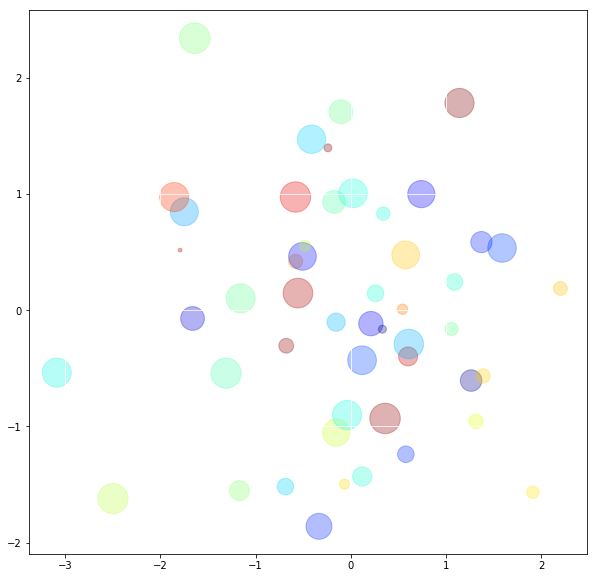

In [6]:
fig = plt.figure(figsize=(10, 10))

ax = plt.subplot()#subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

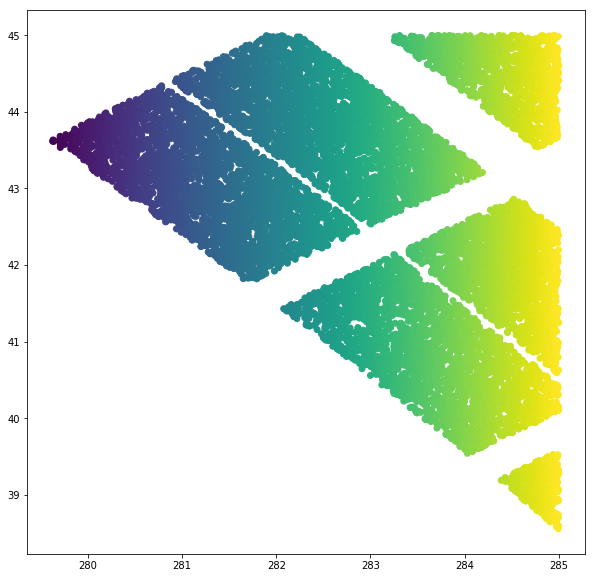

In [5]:
fig = plt.figure(figsize=(10, 10))


ax = plt.subplot()
plt.scatter(df.ra, df.dec, c=df.ra)

In [11]:
df

designation     source_id  gaia_ref_epoch  \
10585   Gaia DR2 2100138441090378752  2.100138e+18          2015.5   
10586   Gaia DR2 2100138166212468864  2.100138e+18          2015.5   
10587   Gaia DR2 2100138338011173120  2.100138e+18          2015.5   
11713   Gaia DR2 2100143629410875904  2.100144e+18          2015.5   
11714   Gaia DR2 2100142907856370944  2.100143e+18          2015.5   
11715   Gaia DR2 2100142839136895232  2.100143e+18          2015.5   
11716   Gaia DR2 2100142529899244160  2.100143e+18          2015.5   
11717   Gaia DR2 2100142701697957504  2.100143e+18          2015.5   
11718   Gaia DR2 2100144213526455808  2.100144e+18          2015.5   
11719   Gaia DR2 2100141258588960000  2.100141e+18          2015.5   
11720   Gaia DR2 2100140945050715520  2.100141e+18          2015.5   
11721   Gaia DR2 2100139403163066880  2.100139e+18          2015.5   
11722   Gaia DR2 2100140945052277248  2.100141e+18          2015.5   
11723   Gaia DR2 2100138612889083520  2.100139e+18          2015.5   
13116   Gaia DR2 2100192007922501376  2.100192e+18          2015.5   
13117   Gaia DR2 2100191217648522240  2.100191e+18          2015.5   
13118   Gaia DR2 2100191320727747200  2.100191e+18          2015.5   
13119   Gaia DR2 2100191011486245248  2.100191e+18          2015.5   
13120   Gaia DR2 2100191045849836160  2.100191e+18          2015.5   
13121   Gaia DR2 2100143938648525568  2.100144e+18          2015.5   
13122   Gaia DR2 2100143766849836800  2.100144e+18          2015.5   
13123   Gaia DR2 2100143766849836544  2.100144e+18          2015.5   
13124   Gaia DR2 2100145690995215488  2.100146e+18          2015.5   
13125   Gaia DR2 2100142976576402176  2.100143e+18          2015.5   
13126   Gaia DR2 2100144522764095360  2.100145e+18          2015.5   
13127   Gaia DR2 2100145519196535168  2.100146e+18          2015.5   
13128   Gaia DR2 2100145519196531840  2.100146e+18          2015.5   
13129   Gaia DR2 2100145416117311488  2.100145e+18          2015.5   
13130   Gaia DR2 2100142770417436416  2.100143e+18          2015.5   
13131   Gaia DR2 2100144488404888832  2.100144e+18          2015.5   
...                              ...           ...             ...   
116167  Gaia DR2 2106747845999362560  2.106748e+18          2015.5   
116168  Gaia DR2 2106747845999362688  2.106748e+18          2015.5   
116169  Gaia DR2 2106748395758013184  2.106748e+18          2015.5   
116170  Gaia DR2 2106744925424425344  2.106745e+18          2015.5   
116171  Gaia DR2 2106748395758012288  2.106748e+18          2015.5   
116172  Gaia DR2 2106748567556718464  2.106749e+18          2015.5   
116173  Gaia DR2 2106745058563728384  2.106745e+18          2015.5   
116174  Gaia DR2 2106748563257033728  2.106749e+18          2015.5   
116175  Gaia DR2 2106747090087977600  2.106747e+18          2015.5   
116176  Gaia DR2 2106745406460781440  2.106745e+18          2015.5   
116177  Gaia DR2 2106745509540002432  2.106746e+18          2015.5   
116178  Gaia DR2 2106745165942913792  2.106745e+18          2015.5   
116179  Gaia DR2 2106745303381572864  2.106745e+18          2015.5   
116180  Gaia DR2 2106745131582877056  2.106745e+18          2015.5   
116181  Gaia DR2 2106746780850336768  2.106747e+18          2015.5   
116182  Gaia DR2 2106746883929557760  2.106747e+18          2015.5   
116183  Gaia DR2 2106744478747856896  2.106744e+18          2015.5   
116184  Gaia DR2 2106746883929557248  2.106747e+18          2015.5   
116185  Gaia DR2 2106744371371681792  2.106744e+18          2015.5   
116186  Gaia DR2 2106746918289298944  2.106747e+18          2015.5   
116187  Gaia DR2 2106746536034206848  2.106747e+18          2015.5   
116188  Gaia DR2 2106745921856589056  2.106746e+18          2015.5   
116189  Gaia DR2 2106745745758494976  2.106746e+18          2015.5   
116190  Gaia DR2 2106745887497150080  2.106746e+18          2015.5   
116191  Gaia DR2 2106746609051658752  2.106747e+18          2015.5   
116192  Gaia DR2 210674626115456640

In [79]:
import numpy as np
#import barbershop
import pandas as pd
import glob

'''Reading in the data we want to make cuts to'''
sfile = '/home/andy/Documents/Research/HackDay/barbershop/example/example_data.csv'
df = pd.read_csv(sfile)

In [80]:
df

version https://git-lfs.github.com/spec/v1
0  oid sha256:9982e2fe6f71f668077f9800d72de1e5c47...
1                                       size 1305873